In [1]:
import pandas as pd

Будем работать с датасетом по оттоку клиентов из банка https://www.kaggle.com/datasets/shubh0799/churn-modelling, но датасет из себя будет представлять две таблицы:

1. Личные данные клиента

    A. CustomerId - Уникальный идентификатор клиента
    B. Surname - Фамилия клиента
    C. Geography - Из какой страны клиент
    D. Gender - Пол клиента
    E. Age - Возраст клиента
    F. EstimatedSalary - Предположительная зарплата клиента
2. Данные по поведению клиента в банке

A. CustomerId - Уникальный идентификатор клиента
B. CustomerId - Уникальный идентификатор клиента
C. Tenure - Сколько лет человек является клиентом банка
D. Balance - Баланс счета
E. NumOfProducts - Количество открытых продуктов
F. HasCrCard - Есть ли у клиента кредитная карта
G. IsActiveMember - Является ли клиент активные участником
H. Exited - Уйдет ли человек в отток

In [2]:
users = pd.read_csv('./users.csv')
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary
0,15634602,Hargrave,France,Female,42,101348.88
1,15647311,Hill,Spain,Female,41,112542.58
2,15619304,Onio,France,Female,42,113931.57
3,15701354,Boni,France,Female,39,93826.63
4,15737888,Mitchell,Spain,Female,43,79084.10


Создание новых признаков

In [3]:
users['new_feature'] = 0
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,new_feature
0,15634602,Hargrave,France,Female,42,101348.88,0
1,15647311,Hill,Spain,Female,41,112542.58,0
2,15619304,Onio,France,Female,42,113931.57,0
3,15701354,Boni,France,Female,39,93826.63,0
4,15737888,Mitchell,Spain,Female,43,79084.10,0


In [4]:
users['Age (days)'] = users['Age'] * 365
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,new_feature,Age (days)
0,15634602,Hargrave,France,Female,42,101348.88,0,15330
1,15647311,Hill,Spain,Female,41,112542.58,0,14965
2,15619304,Onio,France,Female,42,113931.57,0,15330
3,15701354,Boni,France,Female,39,93826.63,0,14235
4,15737888,Mitchell,Spain,Female,43,79084.10,0,15695


In [5]:
for i, row in users.iloc[:2].iterrows():
    print(row)
    print('__' * 30)

CustomerId          15634602
Surname             Hargrave
Geography             France
Gender                Female
Age                       42
EstimatedSalary    101348.88
new_feature                0
Age (days)             15330
Name: 0, dtype: object
____________________________________________________________
CustomerId          15647311
Surname                 Hill
Geography              Spain
Gender                Female
Age                       41
EstimatedSalary    112542.58
new_feature                0
Age (days)             14965
Name: 1, dtype: object
____________________________________________________________


In [6]:
age_days = []

for i, row in users.iterrows():
    age_days.append(row['Age'] * 365)

age_days[:10]

[15330, 14965, 15330, 14235, 15695, 16060, 18250, 10585, 16060, 9855]

In [7]:
users['Age (days) 2'] = age_days
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,new_feature,Age (days),Age (days) 2
0,15634602,Hargrave,France,Female,42,101348.88,0,15330,15330
1,15647311,Hill,Spain,Female,41,112542.58,0,14965,14965
2,15619304,Onio,France,Female,42,113931.57,0,15330,15330
3,15701354,Boni,France,Female,39,93826.63,0,14235,14235
4,15737888,Mitchell,Spain,Female,43,79084.10,0,15695,15695


In [8]:
def age_to_days(x):
    return x * 365

users['Age (days) 3'] = users['Age'].apply(age_to_days)
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,new_feature,Age (days),Age (days) 2,Age (days) 3
0,15634602,Hargrave,France,Female,42,101348.88,0,15330,15330,15330
1,15647311,Hill,Spain,Female,41,112542.58,0,14965,14965,14965
2,15619304,Onio,France,Female,42,113931.57,0,15330,15330,15330
3,15701354,Boni,France,Female,39,93826.63,0,14235,14235,14235
4,15737888,Mitchell,Spain,Female,43,79084.10,0,15695,15695,15695


In [9]:
import time
from tqdm import tqdm
tqdm.pandas()


def age_to_days(x):
    time.sleep(0.001)
    return x * 365

users['Age'].progress_apply(age_to_days)

100%|█████████████████████████████████████████████████████████████████████████████| 9998/9998 [00:19<00:00, 516.11it/s]


0       15330
1       14965
2       15330
3       14235
4       15695
        ...  
9993    10220
9994    10585
9995    14235
9996    12775
9997    13140
Name: Age, Length: 9998, dtype: int64

Удаление признаков

In [10]:
users.drop(columns='new_feature')
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,new_feature,Age (days),Age (days) 2,Age (days) 3
0,15634602,Hargrave,France,Female,42,101348.88,0,15330,15330,15330
1,15647311,Hill,Spain,Female,41,112542.58,0,14965,14965,14965
2,15619304,Onio,France,Female,42,113931.57,0,15330,15330,15330
3,15701354,Boni,France,Female,39,93826.63,0,14235,14235,14235
4,15737888,Mitchell,Spain,Female,43,79084.10,0,15695,15695,15695


In [11]:
users = users.drop(columns='new_feature')
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,Age (days),Age (days) 2,Age (days) 3
0,15634602,Hargrave,France,Female,42,101348.88,15330,15330,15330
1,15647311,Hill,Spain,Female,41,112542.58,14965,14965,14965
2,15619304,Onio,France,Female,42,113931.57,15330,15330,15330
3,15701354,Boni,France,Female,39,93826.63,14235,14235,14235
4,15737888,Mitchell,Spain,Female,43,79084.10,15695,15695,15695


In [12]:
users['new_feature'] = 0

In [13]:
users.drop(columns='new_feature', inplace=True)
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,Age (days),Age (days) 2,Age (days) 3
0,15634602,Hargrave,France,Female,42,101348.88,15330,15330,15330
1,15647311,Hill,Spain,Female,41,112542.58,14965,14965,14965
2,15619304,Onio,France,Female,42,113931.57,15330,15330,15330
3,15701354,Boni,France,Female,39,93826.63,14235,14235,14235
4,15737888,Mitchell,Spain,Female,43,79084.10,15695,15695,15695


In [14]:
users.drop(columns=['Age (days)', 'Age (days) 2', 'Age (days) 3'], inplace=True)
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary
0,15634602,Hargrave,France,Female,42,101348.88
1,15647311,Hill,Spain,Female,41,112542.58
2,15619304,Onio,France,Female,42,113931.57
3,15701354,Boni,France,Female,39,93826.63
4,15737888,Mitchell,Spain,Female,43,79084.10


Изменение существующих признаков

In [16]:
users['target'] = 0
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,Hargrave,France,Female,42,101348.88,0
1,15647311,Hill,Spain,Female,41,112542.58,0
2,15619304,Onio,France,Female,42,113931.57,0
3,15701354,Boni,France,Female,39,93826.63,0
4,15737888,Mitchell,Spain,Female,43,79084.10,0


In [17]:
users.loc[users['Geography'] == 'France']

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,Hargrave,France,Female,42,101348.88,0
2,15619304,Onio,France,Female,42,113931.57,0
3,15701354,Boni,France,Female,39,93826.63,0
6,15592531,Bartlett,France,Male,50,10062.80,0
8,15792365,He,France,Male,44,74940.50,0
...,...,...,...,...,...,...,...
9993,15569266,Rahman,France,Male,28,29179.52,0
9994,15719294,Wood,France,Female,29,167773.55,0
9995,15606229,Obijiaku,France,Male,39,96270.64,0
9996,15569892,Johnstone,France,Male,35,101699.77,0


In [18]:
users.loc[users['Geography'] == 'France', 'target']

0       0
2       0
3       0
6       0
8       0
       ..
9993    0
9994    0
9995    0
9996    0
9997    0
Name: target, Length: 5013, dtype: int64

In [19]:
users[users['Geography'] == 'France']['target'] = 1
users.head()

C:\Users\DmitryDW\AppData\Local\Temp\ipykernel_16292\1082220520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users[users['Geography'] == 'France']['target'] = 1


,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,Hargrave,France,Female,42,101348.88,0
1,15647311,Hill,Spain,Female,41,112542.58,0
2,15619304,Onio,France,Female,42,113931.57,0
3,15701354,Boni,France,Female,39,93826.63,0
4,15737888,Mitchell,Spain,Female,43,79084.10,0


In [20]:
users.loc[users['Geography'] == 'France', 'target'] = 1
users.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,Hargrave,France,Female,42,101348.88,1
1,15647311,Hill,Spain,Female,41,112542.58,0
2,15619304,Onio,France,Female,42,113931.57,1
3,15701354,Boni,France,Female,39,93826.63,1
4,15737888,Mitchell,Spain,Female,43,79084.10,0


In [21]:
.replace

SyntaxError: invalid syntax (2788025187.py, line 1)

In [22]:
users['Gender'].replace({'Female': 'F', 'Male': 'M'}, inplace=True)
users.head()

C:\Users\DmitryDW\AppData\Local\Temp\ipykernel_16292\2997403862.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users['Gender'].replace({'Female': 'F', 'Male': 'M'}, inplace=True)


,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,Hargrave,France,F,42,101348.88,1
1,15647311,Hill,Spain,F,41,112542.58,0
2,15619304,Onio,France,F,42,113931.57,1
3,15701354,Boni,France,F,39,93826.63,1
4,15737888,Mitchell,Spain,F,43,79084.10,0


Методы агрегации

In [23]:
users['Age'].agg(['min', 'max'])

min    18
max    92
Name: Age, dtype: int64

In [24]:
users.agg({
    'Age': ['min', 'max'],
    'EstimatedSalary': 'mean'
})

,Age,EstimatedSalary
min,18.0,NaN
max,92.0,NaN
mean,NaN,100097.151381


In [25]:
users.agg(
    min_age=('Age', 'min'),
    max_age=('Age', 'max'),
    mean_salary=('EstimatedSalary', 'mean')
)

,Age,EstimatedSalary
min_age,18.0,NaN
max_age,92.0,NaN
mean_salary,NaN,100097.151381


Методы объединения

In [27]:
bank = pd.read_csv('bank.csv')
bank.head()

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15613854,622,4,107073.27,2,1,1,1
1,15599195,582,1,88938.62,1,1,1,0
2,15812878,785,2,99806.85,1,0,1,0
3,15602312,605,5,150092.80,1,0,0,0
4,15744689,479,9,92833.89,1,1,0,1


In [28]:
bank.shape

(9895, 8)

In [29]:
merged = users.merge(bank, left_on='CustomerId', right_on='CustomerId')
merged.head()

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15613854,Mauldon,Spain,F,46,30984.59,0,622,4,107073.27,2,1,1,1
1,15599195,Stiger,Germany,M,32,10054.53,0,582,1,88938.62,1,1,1,0
2,15812878,Parsons,Germany,F,36,36976.52,0,785,2,99806.85,1,0,1,0
3,15602312,Walkom,Spain,M,33,71862.79,0,605,5,150092.80,1,0,0,0
4,15744689,T'ang,Germany,M,35,99449.86,0,479,9,92833.89,1,1,0,1


In [30]:
users_id = users.set_index('CustomerId')
users_id.head()

,Surname,Geography,Gender,Age,EstimatedSalary,target
CustomerId,,,,,,
15634602,Hargrave,France,F,42,101348.88,1
15647311,Hill,Spain,F,41,112542.58,0
15619304,Onio,France,F,42,113931.57,1
15701354,Boni,France,F,39,93826.63,1
15737888,Mitchell,Spain,F,43,79084.10,0


In [31]:
bank_id = bank.set_index('CustomerId')
bank_id.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
CustomerId,,,,,,,
15613854,622,4,107073.27,2,1,1,1
15599195,582,1,88938.62,1,1,1,0
15812878,785,2,99806.85,1,0,1,0
15602312,605,5,150092.80,1,0,0,0
15744689,479,9,92833.89,1,1,0,1


In [32]:
bank_id.join(users_id).head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Surname,Geography,Gender,Age,EstimatedSalary,target
CustomerId,,,,,,,,,,,,,
15613854,622,4,107073.27,2,1,1,1,Mauldon,Spain,F,46.0,30984.59,0.0
15599195,582,1,88938.62,1,1,1,0,Stiger,Germany,M,32.0,10054.53,0.0
15812878,785,2,99806.85,1,0,1,0,Parsons,Germany,F,36.0,36976.52,0.0
15602312,605,5,150092.80,1,0,0,0,Walkom,Spain,M,33.0,71862.79,0.0
15744689,479,9,92833.89,1,1,0,1,T'ang,Germany,M,35.0,99449.86,0.0


In [33]:
bank_id.join(users_id).reset_index().head()

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15613854,622,4,107073.27,2,1,1,1,Mauldon,Spain,F,46.0,30984.59,0.0
1,15599195,582,1,88938.62,1,1,1,0,Stiger,Germany,M,32.0,10054.53,0.0
2,15812878,785,2,99806.85,1,0,1,0,Parsons,Germany,F,36.0,36976.52,0.0
3,15602312,605,5,150092.80,1,0,0,0,Walkom,Spain,M,33.0,71862.79,0.0
4,15744689,479,9,92833.89,1,1,0,1,T'ang,Germany,M,35.0,99449.86,0.0


In [34]:
bank.shape

(9895, 8)

Атрибут how
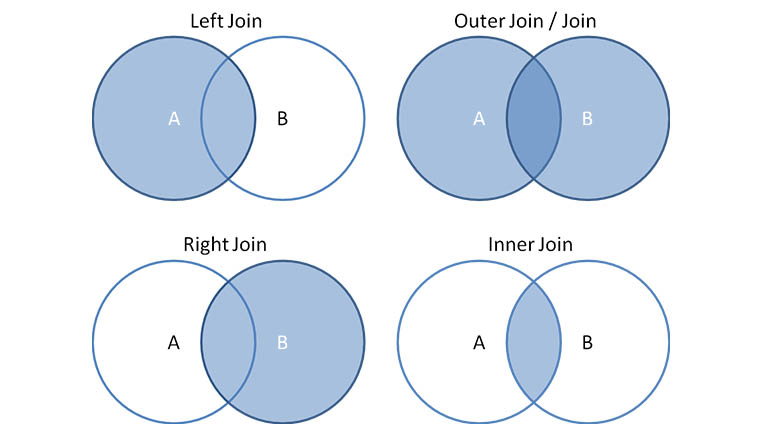

In [35]:
toy_df1 = pd.DataFrame({
    'col_1': [1, 2, 3],
    'col_2': [9, 9, 9]
})

toy_df2 = pd.DataFrame({
    'col_1': [3, 4],
    'col_3': [0, 0]
})

display(toy_df1, toy_df2)

,col_1,col_2
0,1,9
1,2,9
2,3,9


,col_1,col_3
0,3,0
1,4,0


In [36]:
toy_df1.merge(toy_df2, how='left')

,col_1,col_2,col_3
0,1,9,NaN
1,2,9,NaN
2,3,9,0.0


In [37]:
toy_df1.merge(toy_df2, how='right')

,col_1,col_2,col_3
0,3,9.0,0
1,4,NaN,0


In [38]:
toy_df1.merge(toy_df2, how='inner')

,col_1,col_2,col_3
0,3,9,0


In [39]:
toy_df1.merge(toy_df2, how='outer')

,col_1,col_2,col_3
0,1,9.0,NaN
1,2,9.0,NaN
2,3,9.0,0.0
3,4,NaN,0.0


In [40]:
merged_left = bank.merge(users, on='CustomerId', how='left')
merged_left.shape

(9895, 14)

In [41]:
merged_left.isna().sum()

CustomerId         0
CreditScore        0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
Surname            2
Geography          2
Gender             2
Age                2
EstimatedSalary    2
target             2
dtype: int64

In [42]:
merged_left[merged_left['Age'].isna()]

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Surname,Geography,Gender,Age,EstimatedSalary,target
9893,15682355,772,3,75075.31,2,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN
9894,15628319,792,4,130142.79,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
users[users['CustomerId'] == 15682355]

,CustomerId,Surname,Geography,Gender,Age,EstimatedSalary,target


In [44]:
merged_right = bank.merge(users, on='CustomerId', how='right')
merged_right.shape

(9998, 14)

In [45]:
merged_right.isna().sum()

CustomerId           0
CreditScore        105
Tenure             105
Balance            105
NumOfProducts      105
HasCrCard          105
IsActiveMember     105
Exited             105
Surname              0
Geography            0
Gender               0
Age                  0
EstimatedSalary      0
target               0
dtype: int64

In [46]:
merged_right[merged_right['CreditScore'].isna()]

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Surname,Geography,Gender,Age,EstimatedSalary,target
0,15634602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hargrave,France,F,42,101348.88,1
1,15647311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hill,Spain,F,41,112542.58,0
2,15619304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Onio,France,F,42,113931.57,1
3,15701354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Boni,France,F,39,93826.63,1
4,15737888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mitchell,Spain,F,43,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,15808582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fu,France,F,40,161848.03,1
101,15743192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hung,France,F,44,167162.43,1
102,15580146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hung,France,M,31,41970.72,1
103,15776605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bradley,Spain,M,36,60536.56,0


In [47]:
bank[bank['CustomerId'] == 15611325]

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
64,15611325,682,9,57929.81,2,0,0,0


In [48]:
merged_inner = bank.merge(users, on='CustomerId', how='inner')
merged_inner.shape

(9893, 14)

In [49]:
merged_inner.isna().sum()

CustomerId         0
CreditScore        0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
Surname            0
Geography          0
Gender             0
Age                0
EstimatedSalary    0
target             0
dtype: int64

In [50]:
merged_outer = bank.merge(users, on='CustomerId', how='outer')
merged_outer.shape

(10000, 14)

In [51]:
merged_outer.isna().sum()

CustomerId           0
CreditScore        105
Tenure             105
Balance            105
NumOfProducts      105
HasCrCard          105
IsActiveMember     105
Exited             105
Surname              2
Geography            2
Gender               2
Age                  2
EstimatedSalary      2
target               2
dtype: int64

Методы группировок
groupby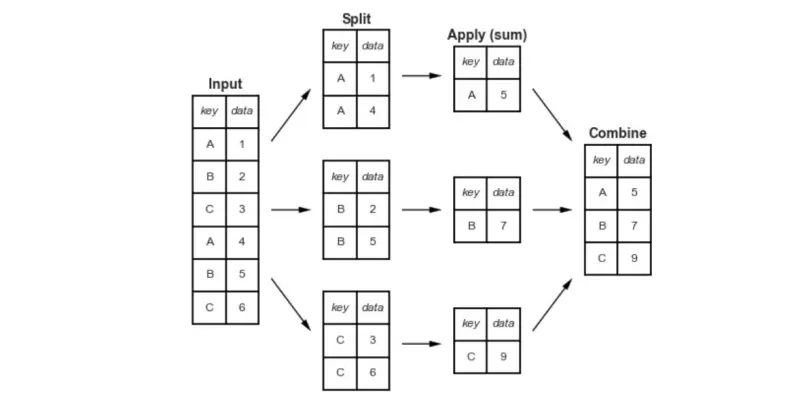

In [52]:
toy_df = pd.DataFrame({
    'client_id': [1, 2, 2, 3, 1, 1],
    'item': ['chocolate', 'cheese', 'ham', 'candy', 'chair', 'book'],
    'price': [68, 280, 302, 39, 2099, 1089]
})

toy_df

,client_id,item,price
0,1,chocolate,68
1,2,cheese,280
2,2,ham,302
3,3,candy,39
4,1,chair,2099
5,1,book,1089


In [53]:
grouped = toy_df.groupby('client_id')
grouped

In [54]:
grouped.groups

{1: [0, 4, 5], 2: [1, 2], 3: [3]}

In [55]:
grouped.sum()

,item,price
client_id,,
1,chocolatechairbook,3256
2,cheeseham,582
3,candy,39


In [56]:
grouped.agg({'price': ['sum', 'min', 'max']})

price           
            sum  min   max
client_id                 
1          3256   68  2099
2           582  280   302
3            39   39    39

In [57]:
users.groupby('Geography').agg({'Age': ['mean'], 'EstimatedSalary': ['min']})

,Age,EstimatedSalary
,mean,min
Geography,,
France,38.513864,90.07
Germany,39.770734,11.58
Spain,38.890997,417.41


pivot_table

In [58]:
toy_df

,client_id,item,price
0,1,chocolate,68
1,2,cheese,280
2,2,ham,302
3,3,candy,39
4,1,chair,2099
5,1,book,1089


In [59]:
toy_df.pivot_table(index='client_id',
                   values='price',
                   aggfunc='sum')

,price
client_id,
1,3256
2,582
3,39


In [60]:
users.pivot_table(index='Geography',
                  aggfunc={'Age': ['mean'], 'EstimatedSalary': 'min'})

,Age,EstimatedSalary
,mean,min
Geography,,
France,38.513864,90.07
Germany,39.770734,11.58
Spain,38.890997,417.41


In [61]:
users.pivot_table(index='Geography',
                  columns='Gender', 
                  values='EstimatedSalary',
                  aggfunc='mean',
                  margins=True,
                  margins_name='Total')

Gender,F,M,Total
Geography,,,
France,99591.409159,100174.252495,99911.490489
Germany,102446.424124,99910.369711,101116.714573
Spain,100734.107475,98425.687680,99440.572281
Total,100615.282193,99665.818876,100097.151381


crosstab

In [62]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'])

Gender,F,M
Geography,,
France,2260,2753
Germany,1193,1315
Spain,1089,1388


In [63]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            values=users['EstimatedSalary'],
            aggfunc='mean')

Gender,F,M
Geography,,
France,99591.409159,100174.252495
Germany,102446.424124,99910.369711
Spain,100734.107475,98425.687680


In [64]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='all')

Gender,F,M
Geography,,
France,0.226045,0.275355
Germany,0.119324,0.131526
Spain,0.108922,0.138828


In [65]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='index')

Gender,F,M
Geography,,
France,0.450828,0.549172
Germany,0.475678,0.524322
Spain,0.439645,0.560355


In [66]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='columns')

Gender,F,M
Geography,,
France,0.497578,0.504582
Germany,0.262660,0.241019
Spain,0.239762,0.254399


Встроенные визуализации

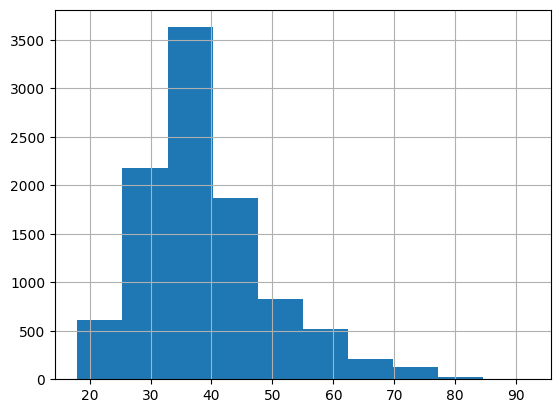

In [68]:
users['Age'].hist();

In [69]:
data = users.groupby('Gender').count()['Age']
data.name = 'Gender'
data

Gender
F    4542
M    5456
Name: Gender, dtype: int64

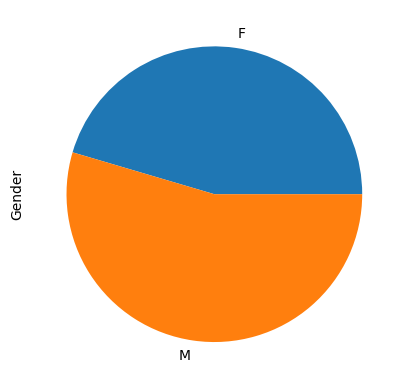

In [70]:
data.plot.pie(y='Gender');

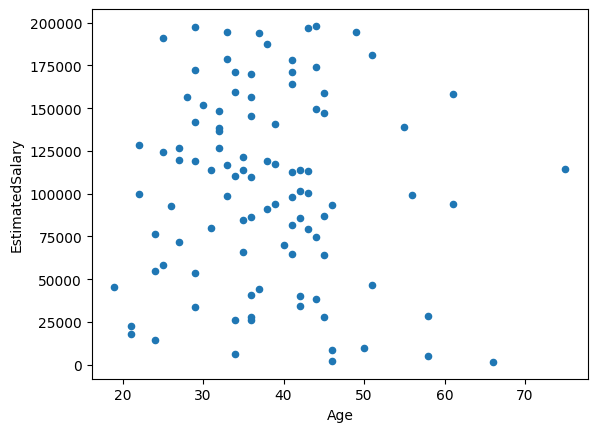

In [71]:
users.iloc[:100].plot.scatter(x='Age', y='EstimatedSalary');

In [72]:
data = bank.groupby('Tenure').count()['Balance']
data.name = 'num_clients'
data

Tenure
0      409
1     1025
2     1038
3      999
4      977
5     1001
6      958
7     1021
8     1013
9      971
10     483
Name: num_clients, dtype: int64

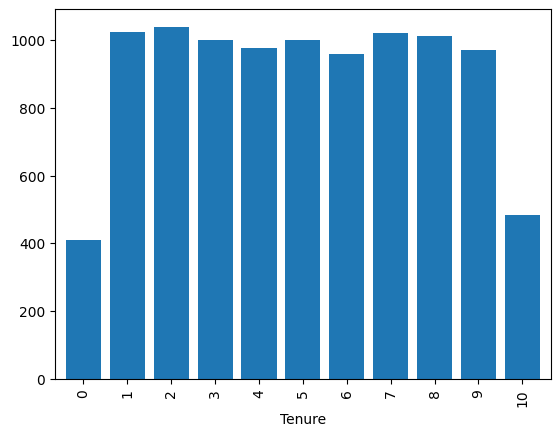

In [73]:
data.plot.bar(width=0.8);